In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import Circle

# Flujo Laminar cilíndrico

El problema consiste en dos cilíndros coaxiales que rotan cada uno por aparte. Su eje de rotación coincide con el eje $z$ y entre ellos hay una capa de fluido lubricando el movimiento entre ellos.

La ecuación de Navier-Stokes en su forma más general se escribe como:

$$\boxed{\rho\left(\frac{\partial v}{\partial t}+(v \cdot \nabla) v\right)=f-\nabla p+\eta \nabla^2 v+\left(\zeta+\frac{1}{3} \eta\right) \nabla(\nabla \cdot v)}$$

La resolución analítica de esta ecuación presenta dificultades; no obstante, es posible realizar suposiciones sobre el problema para facilitar y simplificar los cálculos.


1.   Supongamos que las propiedades del fluido no experimentan cambios temporales, es decir, que estamos tratando con un fluido estacionario. Esta suposición es razonable en contextos de flujo laminar, donde se puede aproximar que el movimiento del fluido es ordenado. Por lo tanto, $\frac{\partial v}{\partial t}=0$.

2.   Adoptemos la hipótesis de un flujo incompresible, lo que implica que la densidad del fluido se mantiene constante. Aunque la validez de esta aproximación depende de las características específicas del fluido, en este contexto la consideraremos apropiada. Luego, $\left(\zeta+\frac{1}{3} \eta\right) \nabla(\nabla \cdot v)=0$.

3.    En este caso, asumiremos que no hay fuerzas externas a tener en cuenta, lo que significa que podemos despreciar los efectos de la gravedad en el problema y $f=0$.

Finalmente, en el contexto del flujo laminar cilíndrico, la ecuación de Navier-Stokes se expresa de la siguiente manera:

$$\boxed{\rho(v \cdot \nabla) v=-\nabla p+\eta \nabla^2 v} \ \ \ \ \ \ (1)$$

Comencemos analizando la velocidad. Dado que los cilindros, tanto interno como externo, simplemente rotan sin realizar un desplazamiento, podemos inferir que el flujo carece de una componente de velocidad en la dirección z. Además, al tratarse de un flujo incompresible, la rotación inicial no altera la componente radial del fluido. En consecuencia, la velocidad se vuelve puramente tangencial, si bien esta última depende de la posición radial de las capas de fluido.

$$\boxed{\vec{v}=v_\phi(r)\hat{\phi}} \ \ \ \ \ \ (2)$$

El término de la izquierda, se puede reescribir usando la propiedad $(v \cdot \nabla) v = v\cdot (\nabla v)$. Usando coordenadas cilíndricas (base coordenada ortonormal es ($\hat{r},\hat{\phi},\hat{z}$)) sin dependencia en z:

\begin{align}
\nabla \vec{v} &= \left(\hat{r}\frac{\partial}{\partial r}+\hat{\phi}\frac{1}{r}\frac{\partial}{\partial\phi}\right)v_\phi(r)\hat{\phi}\\
&= \hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)+\hat{\phi}\frac{v_\phi(r)}{r}\frac{\partial}{\partial r}\hat{\phi}\\
&= \hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)-\hat{\phi}\hat{r}\frac{v_\phi(r)}{r}
\end{align}

Donde se usó que en coordenadas cilíndricas $\frac{\partial}{\partial r}\hat{\phi}=-\hat{r}$,. Luego:

\begin{align}
\vec{v}\cdot (\nabla \vec{v}) &= v_\phi(r)\hat{\phi}\cdot\left(\hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)-\hat{\phi}\hat{r}\frac{v_\phi(r)}{r}\right)\\
&= v_\phi(r)(\hat{\phi}\cdot\hat{r})\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)-v_\phi(r)(\hat{\phi}\cdot\hat{\phi})\hat{r}\frac{v_\phi(r)}{r}\\
&= -v_\phi(r)\hat{r}\frac{v_\phi(r)}{r}
\end{align}

$$\boxed{\vec{v}\cdot (\nabla \vec{v})=-\hat{r}\frac{v_\phi(r)^2}{r}} \ \ \ \ \ \ (3)$$

En el primer término del lado derecho de la ecuación $(1)$ se tiene en como la presión no tiene dependencia de la componente tangencial, entonces:

$$\boxed{\nabla \vec{p}=\hat{r}\frac{\partial \vec{p}}{\partial r}+\hat{z}\frac{\partial \vec{p}}{\partial z}} \ \ \ \ \ \ (4)$$

Para desarrollar el segundo término, se tiene que por definición $\nabla^2 \vec{v} =\nabla \cdot(\nabla  \vec{v})$

\begin{align}
\nabla^2 \vec{v} &= \left(\hat{r}\frac{\partial}{\partial r}+\hat{\phi}\frac{1}{r}\frac{\partial}{\partial\phi}\right)\cdot \left(\hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)-\hat{\phi}\hat{r}\frac{v_\phi(r)}{r}\right)\\
&= \hat{r}\frac{\partial}{\partial r}\left(\hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)\right)-\hat{r}\frac{\partial}{\partial r}\left(\hat{\phi}\hat{r}\frac{v_\phi(r)}{r}\right)+\hat{\phi}\frac{1}{r}\frac{\partial}{\partial\phi}\left(\hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)\right)-\hat{\phi}\frac{1}{r}\frac{\partial}{\partial\phi}\left(\hat{\phi}\hat{r}\frac{v_\phi(r)}{r}\right)\\
&= \hat{\phi}\frac{\partial^2}{\partial r^2}v_\phi(r)+\hat{\phi}\frac{1}{r}\frac{\partial}{\partial}v_\phi(r)-\hat{\phi}\frac{v_\phi(r)}{r^2}\\
&= \hat{\phi}\frac{d}{dr}\left(\frac{1}{r}\frac{d}{dr}(r v_\phi(r)) \right)
\end{align}

$$\boxed{\nabla^2 \vec{v}=\hat{\phi}\frac{d}{dr}\left(\frac{1}{r}\frac{d}{dr}(r v_\phi(r)) \right)} \ \ \ \ \ \ (5)$$

Reemplazando $(3),(4),(5)$ en $(1)$:

$$\rho\left(-\hat{r}\frac{v_\phi(r)^2}{r}\right)=-\left(\hat{r}\frac{\partial \vec{p}}{\partial r}+\hat{z}\frac{\partial \vec{p}}{\partial z}\right)+\eta \hat{\phi}\frac{d}{dr}\left(\frac{1}{r}\frac{d}{dr}(r v_\phi(r)) \right)$$

Separando las ecuaciones por componentes:

\begin{align}
-\hat{r}\rho\frac{v_\phi(r)^2}{r} &= -\hat{r}\frac{\partial \vec{p}}{\partial r} \\
0 &= \eta \frac{d}{dr}\left(\frac{1}{r}\frac{d}{dr}(r v_\phi(r)) \right) \\
0 &= -\frac{\partial \vec{p}}{\partial z}
\end{align}

La solución para el campo de velocidades usando que la velocidad de rotación del cilindro interno de radio $a$ es $v_\phi(a)=a\Omega$ y que en este momento, el cilindro externo no tiene movimiento $v_\phi(b)=0$, entonces:

$$\boxed{v_\phi=\frac{\Omega a^2}{r}\frac{b^2-r^2}{b^2-a^2}}$$

Solución tomada de [1].




In [ ]:
def vfield_laminar_cilindrico(x,y,z,t,vpars):
  """Calcula el campo de velocidades donde a es el tamaño del cilindro interno
  y b es el del externo, en este caso solo se considera que el interno es el que
  está rotando."""

  #Parámetros
  Omega,a,b = vpars

  #Calcula coordenadas cilindricas
  r=np.sqrt(x**2+y**2)
  phi=np.arctan2(y,x)

  #Componentes cilíndricas de la velocidad
  vr = 0
  vphi = Omega * a**2 / r * (b**2-r**2) / (b**2 - a**2)

  #Vectores unitarios en coordenadas cilíndricas en cartesianas
  er=np.array([np.cos(phi),np.sin(phi),0])
  ephi=np.array([-np.sin(phi),np.cos(phi),0])

  #Velocidad en cartesianas
  v=vr*er+vphi*ephi
  return v

In [ ]:
#Condiciones del problema

Omega = 2 #vel angular
a = 3
b = 10

vpars=(Omega,a,b)

(-11.0, 11.0, -11.0, 11.0)

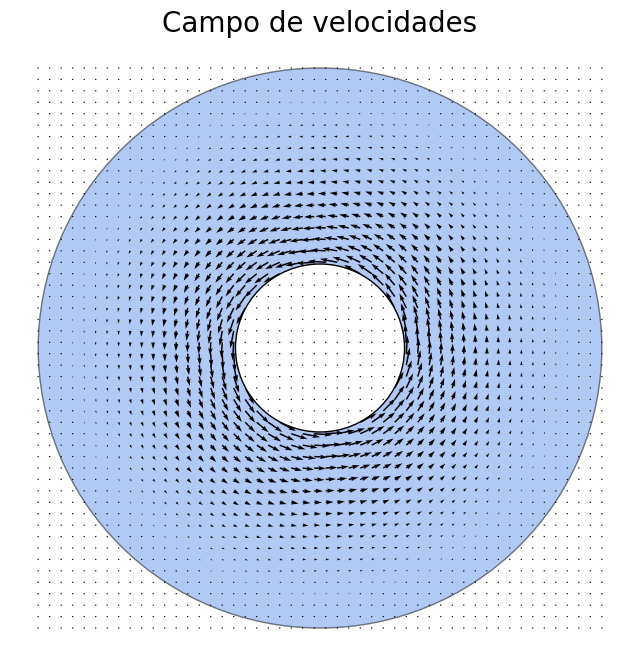

In [ ]:
#Malla rectangular
NG=50
xs=np.linspace(-b,b,NG)
ys=np.linspace(-b,b,NG)
zs=np.zeros(NG)                         #plano z=0

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

t=0
VXS=np.zeros_like(XS)
VYS=np.zeros_like(XS)
VZS=np.zeros_like(XS)

for i in range(NG):
  for j in range(NG):
    if np.sqrt(YS[i,j]**2+XS[i,j]**2)<=b and np.sqrt(YS[i,j]**2+XS[i,j]**2)>=a:
      VXS[i,j],VYS[i,j],VZS[i,j]=vfield_laminar_cilindrico(XS[i,j],
                                                           YS[i,j],
                                                           ZS[i,j],
                                                           t,vpars)

plt.figure(figsize=(8,8))
plt.title("Campo de velocidades", fontsize= 20)
plt.gca().add_patch(Circle((0,0),b,edgecolor='black', facecolor = "cornflowerblue", alpha = 0.5))
plt.gca().add_patch(Circle((0,0),a,edgecolor='black', facecolor = "white"))
plt.quiver(XS,YS,VXS,VYS,scale=200)
plt.axis("off")

El campo de presión para este caso es:

$$\boxed{p = p_0 + \frac{1}{2}\rho_0\left(\frac{\Omega a^2}{b^2 - a^2}\right)^2 \left(r^2 - \frac{b^4}{r^2} + 4 b^2 log \frac{b}{r}\right)}$$

(-10.0, 10.0, -10.0, 10.0)

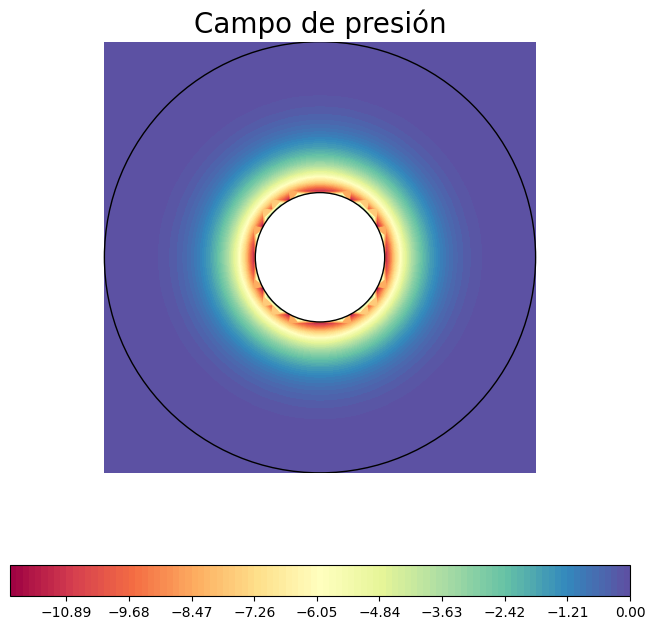

In [ ]:
#Malla rectangular
xs=np.linspace(-b,b,NG)
ys=np.linspace(-b,b,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

#Coordenadas cilindricas
RS=np.sqrt(XS**2+YS**2)
PHIS=np.arctan2(YS,XS)

#Presión
rho0 = 1
p0 = 0
eta = 1
PS = p0 + 1/2 * rho0 * (Omega*a**2 / (b**2 - a**2))**2 * (RS**2 - b**4 / RS**2 + 4 * b**2 *np.log(b/RS))

cond1 = (RS<a); cond2 = (RS>b)
PS[cond1] = 0; PS[cond2] = 0


plt.figure(figsize=(8,8))
plt.title("Campo de presión", fontsize= 20)
c=plt.contourf(XS,YS,PS,levels=np.linspace(PS.min(),PS.max(),100),
               cmap="Spectral")
plt.gca().add_patch(Circle((0,0),b,edgecolor='black', fill=False))
plt.gca().add_patch(Circle((0,0),a,edgecolor='black',facecolor = "white"))
plt.colorbar(c, orientation = "horizontal")
plt.axis("equal")
plt.axis("off")

Recordemos que el estrés indicialmente es:

$$\sigma_{ij}=-\rho \delta_{ij}+\eta(\nabla_i v_j + \nabla_j v_i)$$

Note que todas las componentes del tensor de esfuerzo que involucran la componente $z$ se anulan, ya que la velocidad solo tiene componente en $\hat{\phi}$, por lo que solo sobrevive la componente $\sigma_{\phi r}$.

\begin{align}
\sigma_{\phi r}&=\eta(\nabla_\phi v_r + \nabla_r v_\phi)\\
&= \eta \nabla_r v_\phi \\
&= \eta \left(\frac{d v_\phi}{dr}-\frac{v_\phi}{r}\right)
\end{align}

Con la definión obtenida con anterioridad: $\ \ \ \boxed{v_\phi=\frac{\Omega a^2}{r}\frac{b^2-r^2}{b^2-a^2}}$, se obtiene:

$$\boxed{\sigma_{\phi r}=-\frac{2\eta\Omega}{r^2}\frac{a^2b^2}{b^2-a^2}}$$

(-10.0, 10.0, -10.0, 10.0)

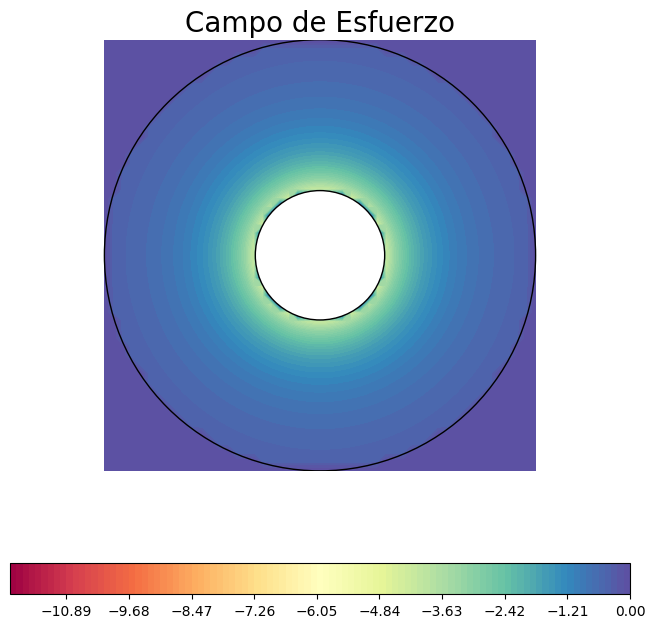

In [ ]:
#Malla rectangular
xs=np.linspace(-b,b,NG)
ys=np.linspace(-b,b,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

#Coordenadas cilindricas
RS=np.sqrt(XS**2+YS**2)
PHIS=np.arctan2(YS,XS)

#Estres
sigma = -2*eta*Omega/RS**2 *(a**2*b**2)/(b**2-a**2)

cond1 = (RS<a); cond2 = (RS>b)
sigma[cond1] = 0; sigma[cond2] = 0


plt.figure(figsize=(8,8))
plt.title("Campo de Esfuerzo", fontsize= 20)
c=plt.contourf(XS,YS,sigma,levels=np.linspace(PS.min(),PS.max(),100),cmap="Spectral")
plt.gca().add_patch(Circle((0,0),b,edgecolor='black', fill=False))
plt.gca().add_patch(Circle((0,0),a,edgecolor='black',facecolor = "white"))
plt.colorbar(c, orientation = "horizontal")
plt.axis("equal")
plt.axis("off")